In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# 데이터 불러오기

In [2]:
train  = pd.read_csv('../data/competition_data/train.csv')
test  = pd.read_csv('../data/competition_data/test.csv')

In [3]:
train.tail()

,index,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
14995,14995,2.0,5.0,4.0,3.0,3.0,4.0,4.0,4.0,3.0,...,1.0,17,1.0,1.0,3.0,2.0,1.0,3.0,2.0,0
14996,14996,5.0,4.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0,...,2.0,45,1.0,3.0,1.0,1.0,2.0,3.0,2.0,1
14997,14997,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,...,1.0,20,1.0,1.0,2.0,1.0,1.0,3.0,1.0,1
14998,14998,5.0,5.0,4.0,5.0,5.0,5.0,5.0,1.0,5.0,...,1.0,29,1.0,12.0,4.0,2.0,2.0,2.0,1.0,0
14999,14999,5.0,4.0,2.0,5.0,2.0,2.0,4.0,2.0,4.0,...,2.0,21,1.0,2.0,2.0,2.0,1.0,1.0,2.0,1


In [4]:
test.tail()

,index,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,gender,engnat,age,hand,religion,orientation,voted,married,familysize,ASD
35447,35447,4.0,5.0,5.0,3.0,3.0,4.0,5.0,5.0,4.0,...,2.0,2.0,16,3.0,10.0,4.0,2.0,1.0,3.0,2.0
35448,35448,5.0,5.0,5.0,5.0,5.0,4.0,5.0,3.0,5.0,...,3.0,1.0,16,3.0,2.0,5.0,2.0,1.0,2.0,2.0
35449,35449,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,1.0,1.0,31,1.0,1.0,5.0,1.0,1.0,2.0,2.0
35450,35450,5.0,5.0,4.0,5.0,5.0,1.0,5.0,1.0,5.0,...,1.0,1.0,19,1.0,12.0,1.0,2.0,1.0,NaN,2.0
35451,35451,5.0,5.0,4.0,5.0,2.0,4.0,3.0,5.0,4.0,...,2.0,1.0,14,2.0,NaN,2.0,2.0,1.0,1.0,2.0


# 데이터 정보 확인

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 70 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         15000 non-null  int64  
 1   Q1            14959 non-null  float64
 2   Q2            14931 non-null  float64
 3   Q3            14950 non-null  float64
 4   Q4            14929 non-null  float64
 5   Q5            14962 non-null  float64
 6   Q6            14952 non-null  float64
 7   Q7            14924 non-null  float64
 8   Q8            14952 non-null  float64
 9   Q9            14944 non-null  float64
 10  Q10           14928 non-null  float64
 11  Q11           14941 non-null  float64
 12  Q12           14933 non-null  float64
 13  Q13           14960 non-null  float64
 14  Q14           14964 non-null  float64
 15  Q15           14955 non-null  float64
 16  Q16           14967 non-null  float64
 17  Q17           14963 non-null  float64
 18  Q18           14937 non-nu

Q1 ~ Q26 : 마키아벨리니즘 테스트

conutry : 국가

introelapse : 

testelapse : 

surveyelapse : 

TIPI1 ~ TIPI10 : "나는 나 자신을 다음과 같이 생각합니다"
![](https://velog.velcdn.com/images/danbibibi/post/860d6502-7c76-4ac0-afe1-d78886ec3506/image.png)

VCL1 ~ VCL13 : 실존하는 해당 단어의 정의을 앎 (1=Yes, 0=No)

VCL14 ~ VCL16 : 허구인 단어의 정의를 앎 (1=Yes, 0=No)

education : 교육 수준 (1=Less than high school, 2=High school, 3=University degree, 4=Graduate degree, 0=무응답)

urban : 유년기 거주 구역 (1=시골(시골), 2=교외, 3=도시, 0=무응답)

gender : 성별

engnat : 모국어가 영어 (1=Yes, 2=No, 0=무응답)

age : 연령

hand : 필기하는 손 (1=오른쪽, 2=왼쪽, 3=둘 다, 0=무응답)

religion : 종교

orientation : 성적 취향 (1=Heterosexual, 2=Bisexual, 3=Homosexual, 4=Asexual, 5=Other)

voted : 지난 해 국가 선거 투표 여부 (1=Yes, 2=No)
 
married : 혼인 상태 (1=미혼, 2=현재 기혼, 3=이전 기혼, 0=기타)

familysize : 형제자매 수

ASD : 자폐 스펙트럼 장애

**nerdiness : 괴짜 (target)**

# 데이터 전처리

In [6]:
train.drop('index', axis=1, inplace=True)
train

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
0,1.0,5.0,5.0,5.0,1.0,4.0,5.0,5.0,1.0,3.0,...,1.0,20,2.0,12.0,4.0,2.0,1.0,4.0,2.0,1
1,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,3.0,...,1.0,49,1.0,2.0,1.0,1.0,2.0,4.0,2.0,1
2,4.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,4.0,...,2.0,43,1.0,2.0,2.0,2.0,3.0,4.0,2.0,1
3,4.0,4.0,4.0,2.0,4.0,3.0,3.0,5.0,3.0,4.0,...,1.0,17,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1
4,4.0,4.0,4.0,4.0,3.0,3.0,4.0,2.0,3.0,4.0,...,2.0,18,2.0,12.0,1.0,2.0,1.0,1.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2.0,5.0,4.0,3.0,3.0,4.0,4.0,4.0,3.0,4.0,...,1.0,17,1.0,1.0,3.0,2.0,1.0,3.0,2.0,0
14996,5.0,4.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0,5.0,...,2.0,45,1.0,3.0,1.0,1.0,2.0,3.0,2.0,1
14997,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,...,1.0,20,1.0,1.0,2.0,1.0,1.0,3.0,1.0,1
14998,5.0,5.0,4.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,...,1.0,29,1.0,12.0,4.0,2.0,2.0,2.0,1.0,0


## 중복 제거

In [7]:
train = train.drop_duplicates(keep='last')
train

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
1,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,3.0,...,1.0,49,1.0,2.0,1.0,1.0,2.0,4.0,2.0,1
5,5.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,3.0,...,1.0,26,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
7,4.0,5.0,4.0,4.0,4.0,4.0,2.0,5.0,3.0,4.0,...,2.0,34,1.0,2.0,5.0,1.0,1.0,2.0,2.0,1
8,4.0,4.0,3.0,4.0,4.0,5.0,4.0,3.0,3.0,4.0,...,1.0,20,1.0,7.0,1.0,1.0,1.0,3.0,2.0,0
9,3.0,3.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,4.0,...,2.0,17,1.0,10.0,1.0,2.0,1.0,5.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2.0,5.0,4.0,3.0,3.0,4.0,4.0,4.0,3.0,4.0,...,1.0,17,1.0,1.0,3.0,2.0,1.0,3.0,2.0,0
14996,5.0,4.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0,5.0,...,2.0,45,1.0,3.0,1.0,1.0,2.0,3.0,2.0,1
14997,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,...,1.0,20,1.0,1.0,2.0,1.0,1.0,3.0,1.0,1
14998,5.0,5.0,4.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,...,1.0,29,1.0,12.0,4.0,2.0,2.0,2.0,1.0,0


## 상관 계수 확인

In [8]:
for col, corr_ in zip(train.columns, train.corr()['nerdiness'].values):
    print(col, corr_)

Q1 0.28741493773792437
Q2 0.25926968131006617
Q3 0.20657250508589023
Q4 0.2666364789598166
Q5 0.23411287458234958
Q6 0.3108801135256393
Q7 0.20647258971366872
Q8 0.22691469881757717
Q9 0.22556047951655986
Q10 0.18532075020697802
Q11 0.21998601308103963
Q12 0.2439771125997181
Q13 0.2206619937919827
Q14 0.23429363467749523
Q15 0.24866675655335424
Q16 0.17954722156874178
Q17 0.20838840855822305
Q18 0.18460756585326926
Q19 0.16201039018680963
Q20 0.21186755701583898
Q21 0.16111590956842914
Q22 0.16478419494590196
Q23 0.20418815006972987
Q24 0.23344923925409272
Q25 0.17999238423085148
Q26 0.245310184507631
country 0.004064070082998832
introelapse 0.002795056413104249
testelapse 0.010291228439329853
surveyelapse -0.10802728216942863
TIPI1 0.018245997500290663
TIPI2 0.03086721895452383
TIPI3 0.04581915252174744
TIPI4 0.03627310376053506
TIPI5 0.09567066939628144
TIPI6 0.03647355968510847
TIPI7 0.03264318351484153
TIPI8 -0.01656161039100549
TIPI9 -0.09341322510880833
TIPI10 0.03480628554940900

## 범주형 데이터 전처리

education
country
urban
gender
engnat
hand
religion
orientation
married

In [9]:
train['education'] = train['education'].astype('object')
train['country'] = train['country'].astype('object')
train['urban'] = train['urban'].astype('object')
train['gender'] = train['gender'].astype('object')
train['engnat'] = train['engnat'].astype('object')
train['hand'] = train['hand'].astype('object')
train['religion'] = train['religion'].astype('object')
train['orientation'] = train['orientation'].astype('object')
train['married'] = train['married'].astype('object')
for i in range(1, 17):
    train['VCL'+str(i)] = train['VCL'+str(i)].astype('object')

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12748 entries, 1 to 14999
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Q1            12711 non-null  float64
 1   Q2            12690 non-null  float64
 2   Q3            12706 non-null  float64
 3   Q4            12691 non-null  float64
 4   Q5            12715 non-null  float64
 5   Q6            12709 non-null  float64
 6   Q7            12683 non-null  float64
 7   Q8            12706 non-null  float64
 8   Q9            12702 non-null  float64
 9   Q10           12682 non-null  float64
 10  Q11           12698 non-null  float64
 11  Q12           12692 non-null  float64
 12  Q13           12715 non-null  float64
 13  Q14           12717 non-null  float64
 14  Q15           12710 non-null  float64
 15  Q16           12720 non-null  float64
 16  Q17           12717 non-null  float64
 17  Q18           12695 non-null  float64
 18  Q19           12705 non-nu

## age outlier

In [11]:
train[train['age']>130]

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
4976,4.0,5.0,4.0,3.0,4.0,4.0,4.0,4.0,5.0,5.0,...,2,545,1,2,1,1.0,2,4.0,2.0,0
6725,1.0,1.0,3.0,3.0,5.0,3.0,5.0,1.0,5.0,1.0,...,1,722,2,2,1,1.0,2,3.0,2.0,0
9273,5.0,3.0,1.0,5.0,4.0,3.0,3.0,4.0,5.0,1.0,...,1,38822,1,2,3,2.0,1,3.0,2.0,1
14135,4.0,5.0,4.0,4.0,5.0,5.0,5.0,4.0,4.0,5.0,...,2,336,1,2,1,1.0,1,2.0,2.0,1


In [12]:
train = train[train['age']<130]
train

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
1,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,3.0,...,1,49,1,2,1,1.0,2,4.0,2.0,1
5,5.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,3.0,...,1,26,1,1,1,1.0,1,1.0,1.0,1
7,4.0,5.0,4.0,4.0,4.0,4.0,2.0,5.0,3.0,4.0,...,2,34,1,2,5,1.0,1,2.0,2.0,1
8,4.0,4.0,3.0,4.0,4.0,5.0,4.0,3.0,3.0,4.0,...,1,20,1,7,1,1.0,1,3.0,2.0,0
9,3.0,3.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,4.0,...,2,17,1,10,1,2.0,1,5.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2.0,5.0,4.0,3.0,3.0,4.0,4.0,4.0,3.0,4.0,...,1,17,1,1,3,2.0,1,3.0,2.0,0
14996,5.0,4.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0,5.0,...,2,45,1,3,1,1.0,2,3.0,2.0,1
14997,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,...,1,20,1,1,2,1.0,1,3.0,1.0,1
14998,5.0,5.0,4.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,...,1,29,1,12,4,2.0,2,2.0,1.0,0


In [13]:
train['age'].min()

13

In [14]:
train['age'].max()

123

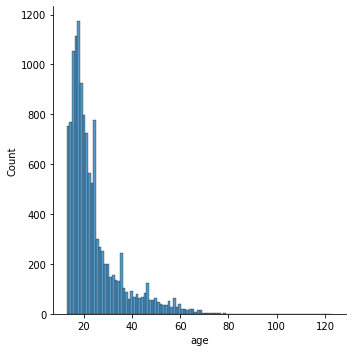

In [15]:
sns.displot(data=train, x="age", bins=100)
plt.show()

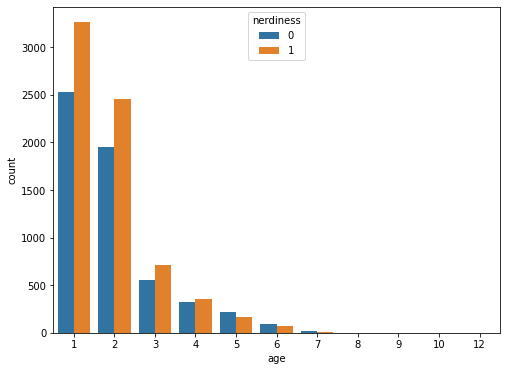

In [16]:
## 그룹화 
age_group = train['age']//10
age_group_train = train
age_group_train['age']//=10
plt.figure(figsize = (8,6))
sns.countplot(data = age_group_train, x = 'age', hue ='nerdiness')
plt.show()

## familysize outlier

In [17]:
train[train['familysize']>=20]

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
1019,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,2,10,3,10,5,1.0,1,2919.0,1.0,0
9817,5.0,4.0,5.0,3.0,3.0,4.0,4.0,5.0,2.0,5.0,...,2,1,1,7,2,2.0,1,39.0,2.0,1
11274,5.0,5.0,5.0,5.0,4.0,4.0,4.0,5.0,5.0,5.0,...,1,2,1,2,2,1.0,1,23.0,2.0,1


In [18]:
train = train[train['familysize']<20]
train

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
1,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,3.0,...,1,4,1,2,1,1.0,2,4.0,2.0,1
5,5.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,3.0,...,1,2,1,1,1,1.0,1,1.0,1.0,1
7,4.0,5.0,4.0,4.0,4.0,4.0,2.0,5.0,3.0,4.0,...,2,3,1,2,5,1.0,1,2.0,2.0,1
8,4.0,4.0,3.0,4.0,4.0,5.0,4.0,3.0,3.0,4.0,...,1,2,1,7,1,1.0,1,3.0,2.0,0
9,3.0,3.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,4.0,...,2,1,1,10,1,2.0,1,5.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2.0,5.0,4.0,3.0,3.0,4.0,4.0,4.0,3.0,4.0,...,1,1,1,1,3,2.0,1,3.0,2.0,0
14996,5.0,4.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0,5.0,...,2,4,1,3,1,1.0,2,3.0,2.0,1
14997,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,...,1,2,1,1,2,1.0,1,3.0,1.0,1
14998,5.0,5.0,4.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,...,1,2,1,12,4,2.0,2,2.0,1.0,0


## nan을 모두 제거하는 경우

In [19]:
train_nonnan = train.dropna()
train_nonnan

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
1,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,3.0,...,1,4,1,2,1,1.0,2,4.0,2.0,1
5,5.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,3.0,...,1,2,1,1,1,1.0,1,1.0,1.0,1
7,4.0,5.0,4.0,4.0,4.0,4.0,2.0,5.0,3.0,4.0,...,2,3,1,2,5,1.0,1,2.0,2.0,1
8,4.0,4.0,3.0,4.0,4.0,5.0,4.0,3.0,3.0,4.0,...,1,2,1,7,1,1.0,1,3.0,2.0,0
9,3.0,3.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,4.0,...,2,1,1,10,1,2.0,1,5.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2.0,5.0,4.0,3.0,3.0,4.0,4.0,4.0,3.0,4.0,...,1,1,1,1,3,2.0,1,3.0,2.0,0
14996,5.0,4.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0,5.0,...,2,4,1,3,1,1.0,2,3.0,2.0,1
14997,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,...,1,2,1,1,2,1.0,1,3.0,1.0,1
14998,5.0,5.0,4.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,...,1,2,1,12,4,2.0,2,2.0,1.0,0


## target 변수 확인

In [20]:
train['nerdiness'].value_counts()

1    6908
0    5559
Name: nerdiness, dtype: int64

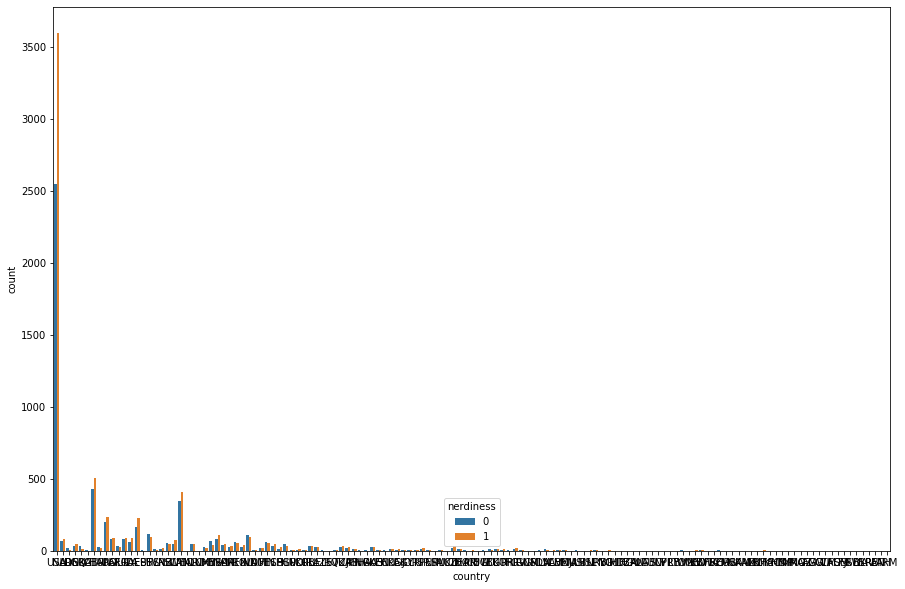

In [21]:
plt.figure(figsize = (15,10))
sns.countplot(data = train, x = 'country', hue ='nerdiness')
plt.show()

In [22]:
train['country'].unique()

array(['USA', 'NLD', 'ARE', 'DNK', 'GRC', 'QAT', 'GBR', 'HUN', 'AUS',
       'POL', 'ARG', 'FRA', 'ITA', 'DEU', 'EST', 'PHL', 'SVN', nan, 'SRB',
       'NZL', 'SWE', 'CAN', 'MAR', 'IDN', 'LUX', 'CHE', 'MYS', 'BRA',
       'NOR', 'PRT', 'MEX', 'ROU', 'IND', 'VNM', 'AUT', 'FIN', 'ESP',
       'CHL', 'SGP', 'HND', 'UKR', 'COL', 'IRL', 'BEL', 'AZE', 'IRQ',
       'SVK', 'TUR', 'ZAF', 'JPN', 'GHA', 'NGA', 'RUS', 'KEN', 'ECU',
       'HKG', 'PAK', 'EGY', 'JOR', 'CRI', 'ISR', 'PER', 'NPL', 'SAU',
       'MKD', 'CZE', 'THA', 'DOM', 'PRI', 'CUW', 'BGD', 'LTU', 'BGR',
       'KOR', 'TTO', 'HRV', 'IRN', 'GUM', 'GRL', 'SDN', 'LVA', 'ALB',
       'CHN', 'VEN', 'MUS', 'JAM', 'LBN', 'ISL', 'URY', 'PNG', 'BIH',
       'GUF', 'MDG', 'DZA', 'BRN', 'ALA', 'VGB', 'TUN', 'SLV', 'CYP',
       'PRY', 'LBY', 'TWN', 'OMN', 'GEO', 'KWT', 'BWA', 'FRO', 'BHR',
       'ZMB', 'UGA', 'NAM', 'KAZ', 'VIR', 'MLT', 'BHS', 'MAC', 'KHM',
       'MNP', 'SYR', 'MNG', 'MOZ', 'AFG', 'AGO', 'MWI', 'GTM', 'LAO',
       'FSM', '

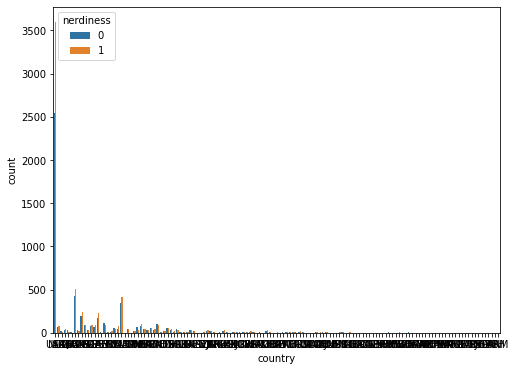

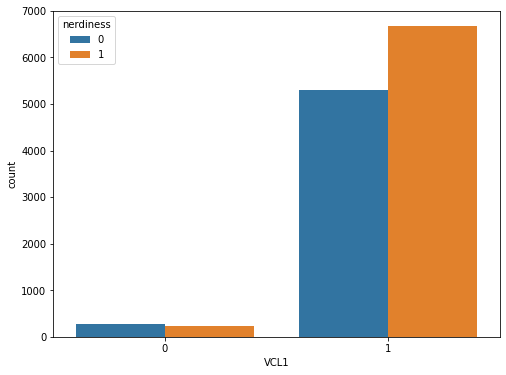

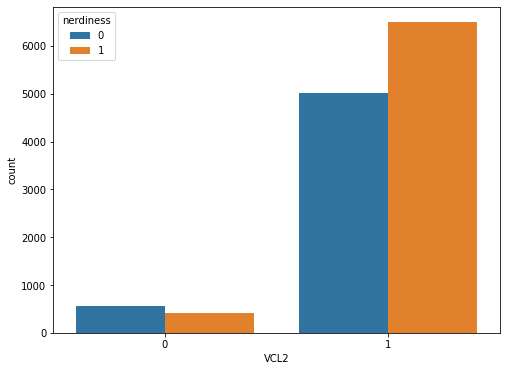

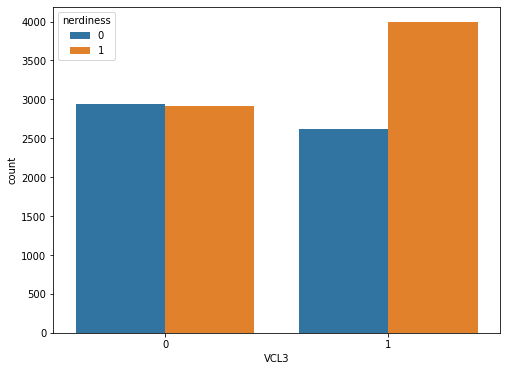

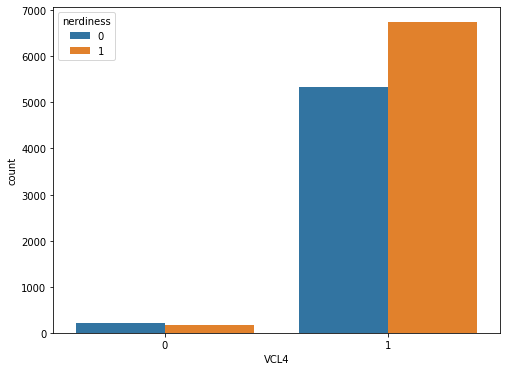

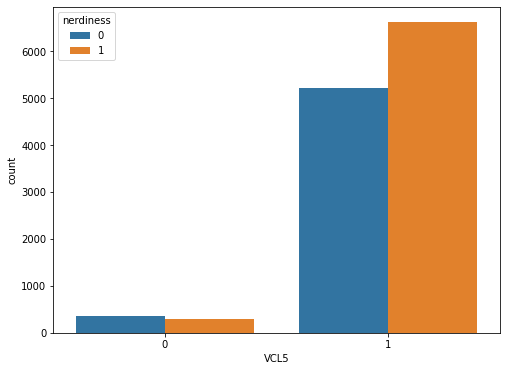

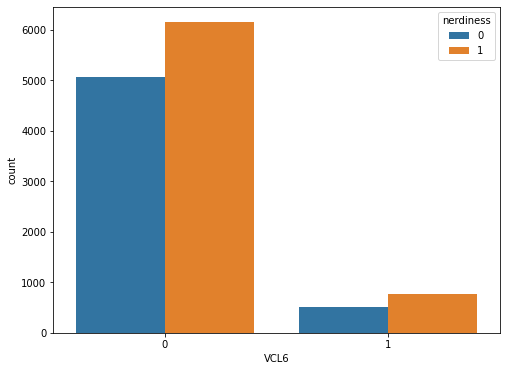

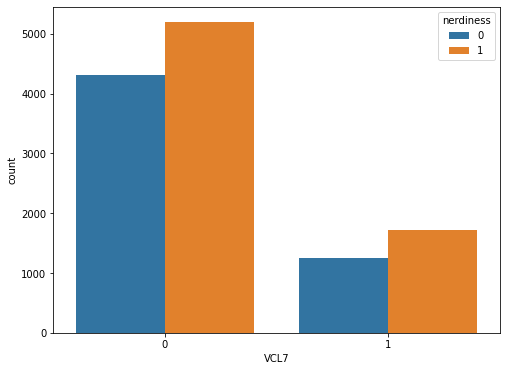

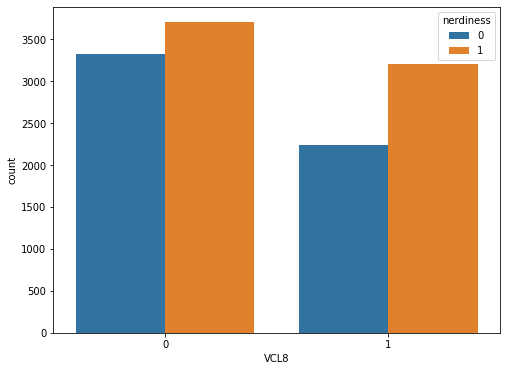

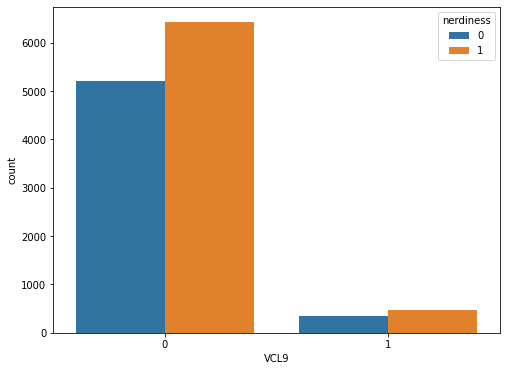

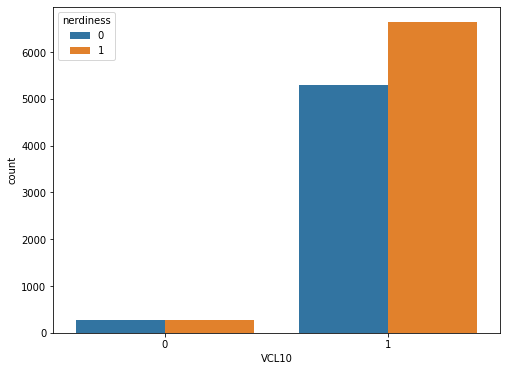

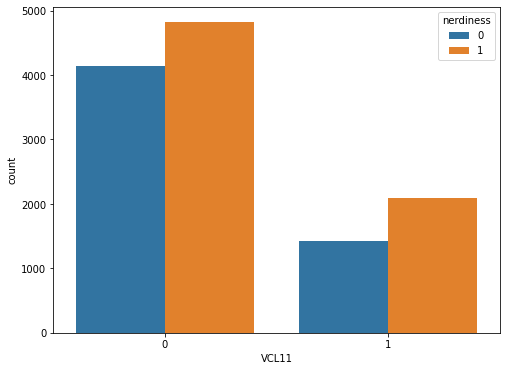

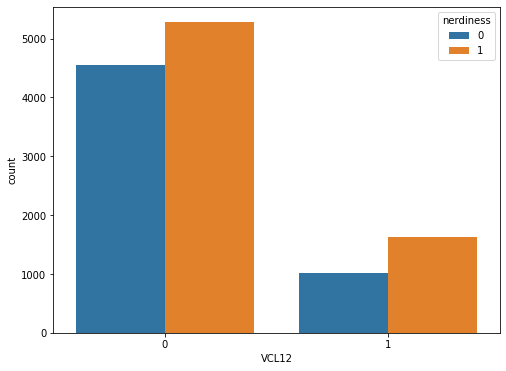

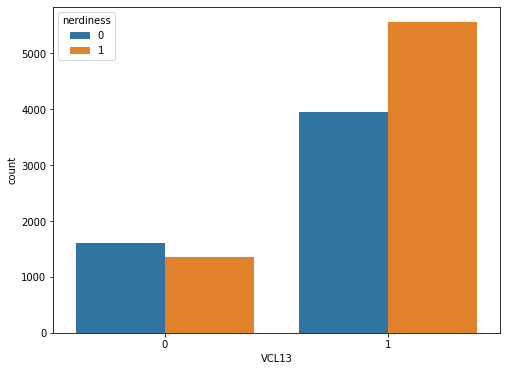

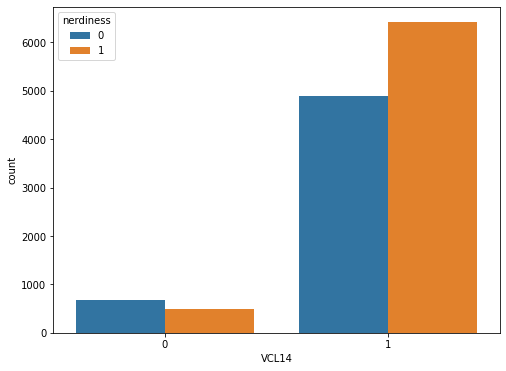

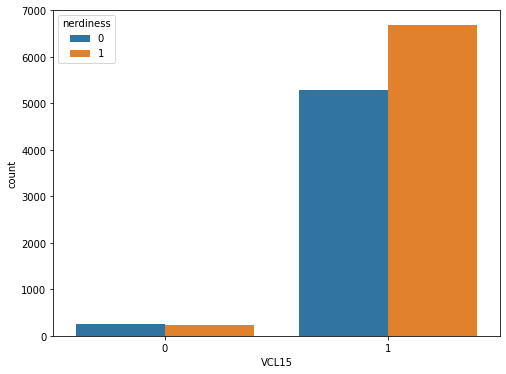

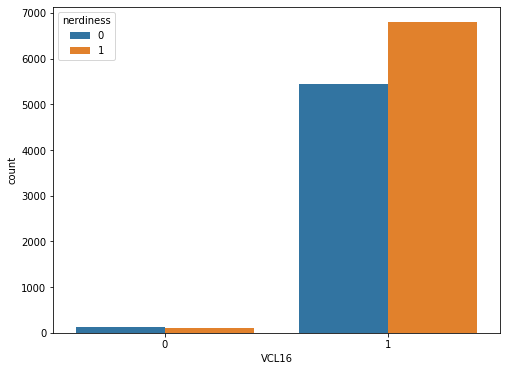

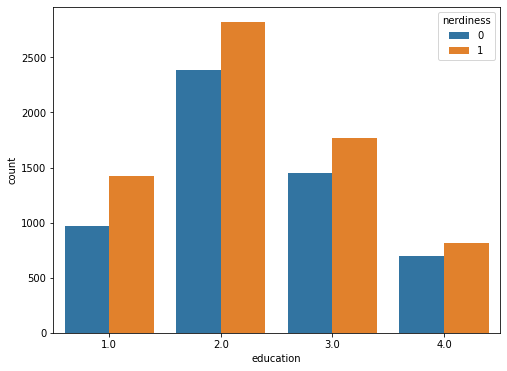

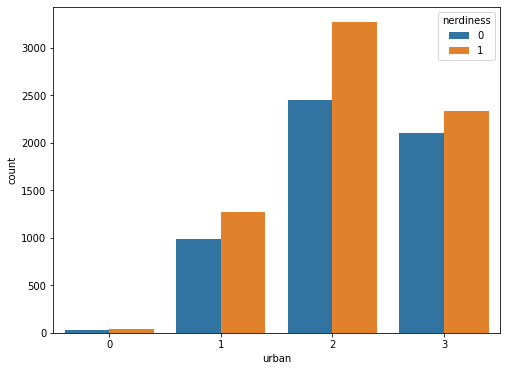

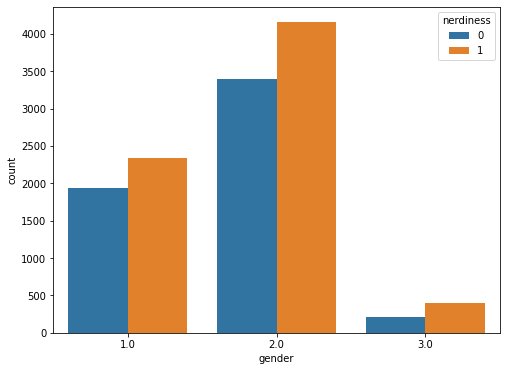

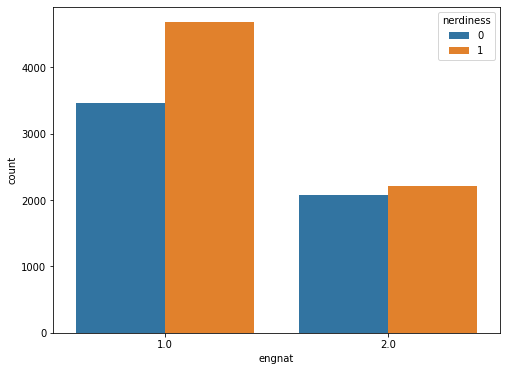

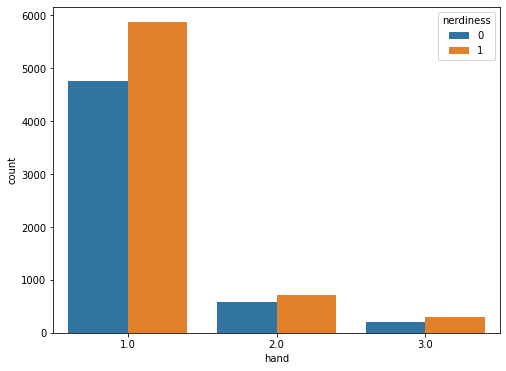

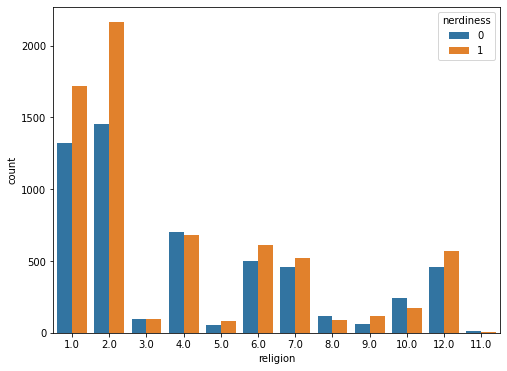

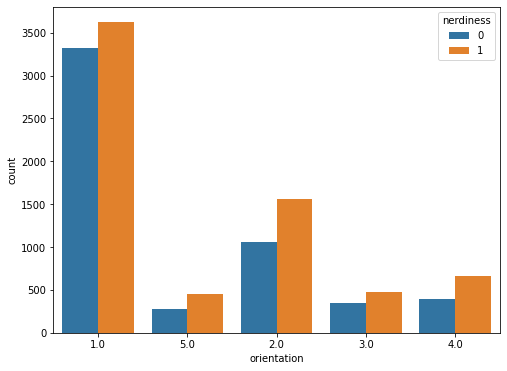

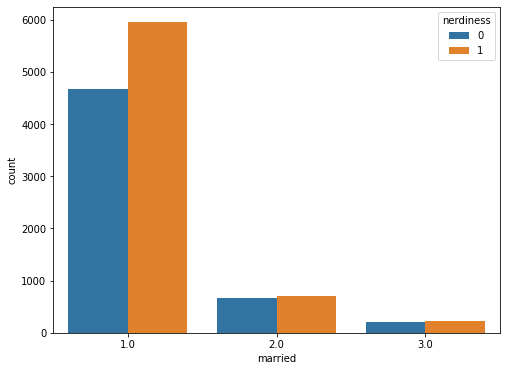

In [23]:
for i, col in enumerate(list(train.columns[train.dtypes == 'object'])):
    plt.figure(figsize = (8,6))
    sns.countplot(data = train, x = col, hue ='nerdiness')
    plt.show()

## Q1 ~ Q26

마키아벨리니즘 성향이 높은 사람이 있다면 +부호인 문항들에서는 높은 답변값을 내놓았을 것이고 -부호인 문항들에서는 낮은 답변값을 내놓았을 것

In [24]:
Q = ['Q'+str(i) for i in range(1, 27)]
Q

['Q1',
 'Q2',
 'Q3',
 'Q4',
 'Q5',
 'Q6',
 'Q7',
 'Q8',
 'Q9',
 'Q10',
 'Q11',
 'Q12',
 'Q13',
 'Q14',
 'Q15',
 'Q16',
 'Q17',
 'Q18',
 'Q19',
 'Q20',
 'Q21',
 'Q22',
 'Q23',
 'Q24',
 'Q25',
 'Q26']

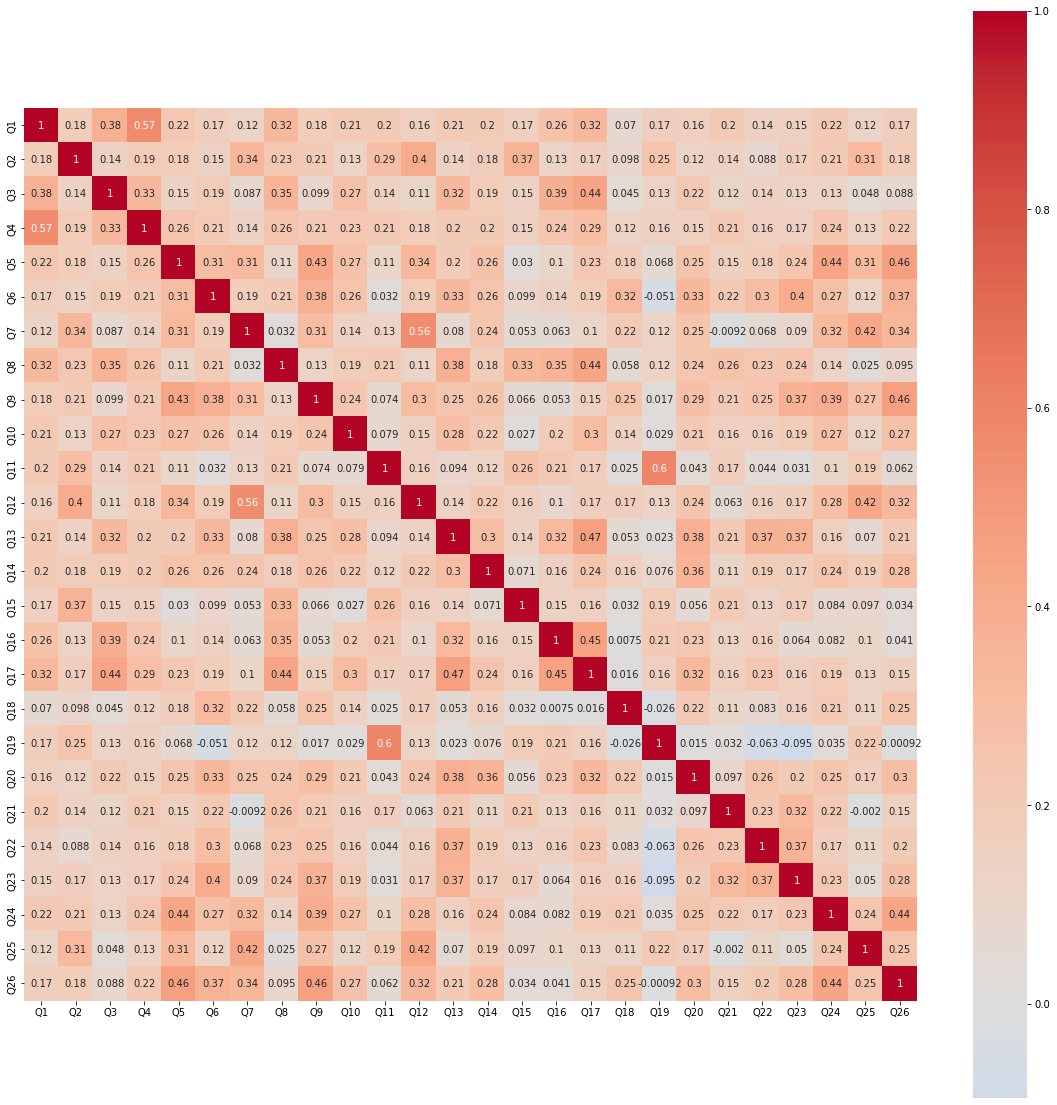

In [30]:
plt.figure(figsize=(20, 20))
correlations = train[Q].corr(method = 'spearman')
sns.heatmap(correlations, cmap="coolwarm", square=True, center=0, annot=True)
plt.show()